In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('NSE Data/NSE Training Data - 1st Jan 2016 to 1st Jan 2022.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1481 non-null   object 
 1   Open       1475 non-null   float64
 2   High       1475 non-null   float64
 3   Low        1475 non-null   float64
 4   Close      1475 non-null   float64
 5   Adj Close  1475 non-null   float64
 6   Volume     1475 non-null   float64
dtypes: float64(6), object(1)
memory usage: 81.1+ KB


In [5]:
df[df['Close'].isnull()]

,Date,Open,High,Low,Close,Adj Close,Volume
151,2016-08-12,NaN,NaN,NaN,NaN,NaN,NaN
493,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN
739,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN
937,2019-10-27,NaN,NaN,NaN,NaN,NaN,NaN
1201,2020-11-14,NaN,NaN,NaN,NaN,NaN,NaN
1233,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df1=df.interpolate(limit_direction="both")
df1.iloc[148:155,:]

,Date,Open,High,Low,Close,Adj Close,Volume
148,2016-08-09,8727.799805,8728.349609,8638.200195,8678.250000,8678.250000,200100.0
149,2016-08-10,8686.700195,8690.099609,8564.599609,8575.299805,8575.299805,173600.0
150,2016-08-11,8572.799805,8601.150391,8540.049805,8592.150391,8592.150391,189200.0
151,2016-08-12,8621.524903,8641.750000,8570.250000,8617.350098,8617.350098,207000.0
152,2016-08-16,8670.250000,8682.349609,8600.450195,8642.549805,8642.549805,224800.0
153,2016-08-17,8639.799805,8667.099609,8603.599609,8624.049805,8624.049805,174100.0
154,2016-08-18,8648.849609,8690.700195,8645.049805,8673.250000,8673.250000,164300.0


In [7]:
df2=df1.reset_index()['Close']

In [8]:
df2.head()

0    7791.299805
1    7784.649902
2    7741.000000
3    7568.299805
4    7601.350098
Name: Close, dtype: float64

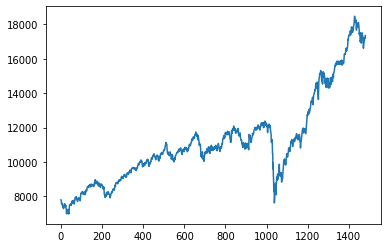

In [9]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [11]:
data=np.array(df2).reshape(-1,1)

In [12]:
Sdata=scaler.fit_transform(data)

In [13]:
Sdata[1:10].shape

(9, 1)

In [14]:
train_size=int(len(Sdata)*0.65)
test_size=len(Sdata)-train_size
train_data,test_data=Sdata[:train_size,:],Sdata[train_size:,:]

In [15]:
train_data.shape,test_data.shape

((962, 1), (519, 1))

In [16]:
len(train_data),len(test_data)

(962, 519)

In [17]:
train_data[1:2,:].shape

(1, 1)

In [18]:
#taking 30 days as time step dvividing 
def traintestsplit(data,times_tep):
    X,Y=[],[]
    for i in range(len(data)-time_step-1):
        X.append(data[i:i+time_step,0])
        Y.append(data[i+time_step,0])
        
    return np.array(X),np.array(Y)    
        
    

In [19]:
time_step = 30
X_train, Y_train = traintestsplit(train_data, time_step)
X_test, Y_test = traintestsplit(test_data, time_step)

In [20]:
print(X_train.shape), print(Y_train.shape)

(931, 30)
(931,)


(None, None)

In [21]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(30,1)))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 30, 100)           80400     
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 201,701
Trainable params: 201,701
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
15/15 [==============================] - 30s 718ms/step - loss: 0.0154 - val_loss: 0.0140
Epoch 2/50
15/15 [==============================] - 5s 300ms/step - loss: 0.0020 - val_loss: 0.0048
Epoch 3/50
15/15 [==============================] - 3s 208ms/step - loss: 5.4389e-04 - val_loss: 0.0022
Epoch 4/50
15/15 [==============================] - 2s 167ms/step - loss: 4.2049e-04 - val_loss: 0.0029
Epoch 5/50
15/15 [==============================] - 2s 162ms/step - loss: 3.6473e-04 - val_loss: 0.0027
Epoch 6/50
15/15 [==============================] - 3s 210ms/step - loss: 3.6235e-04 - val_loss: 0.0032
Epoch 7/50
15/15 [==============================] - 3s 186ms/step - loss: 3.5843e-04 - val_loss: 0.0028
Epoch 8/50
15/15 [==============================] - 3s 173ms/step - loss: 3.4189e-04 - val_loss: 0.0023
Epoch 9/50
15/15 [==============================] - 2s 161ms/step - loss: 3.4478e-04 - val_loss: 0.0021
Epoch 10/50
15/15 [==============================] - 2s 158ms/step - lo

In [26]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [27]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [28]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

10067.02159364343

In [29]:
math.sqrt(mean_squared_error(Y_test,test_predict))

13576.60237929829

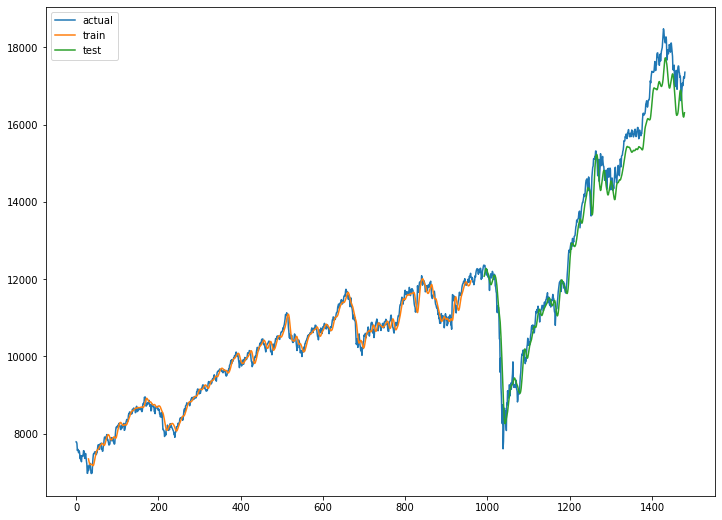

In [30]:
plt.figure(figsize=(12,9))
look_back=30
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1, :] = test_predict
# plot baseline and predictions
plt.plot(data,label='actual')
plt.plot(trainPredictPlot,label='train',)
plt.plot(testPredictPlot,label='test')
plt.legend()
plt.show()
